<a href="https://colab.research.google.com/github/Maithraanand/Predicting-Diabetes-Onset/blob/main/Predicting_Diabities_Onset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes - diabetes.csv')

# Check for missing values
df.info()

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183 

In [ ]:
# 1. Handling missing data
# Replace 0 values with NaN for certain columns
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Fill NaN values with median
for column in zero_columns:
    df[column].fillna(df[column].median(), inplace=True)

# 2. Feature scaling
scaler = StandardScaler()
features = df.drop('Outcome', axis=1)
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 3. Splitting the dataset
X = scaled_features
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("\First few rows of scaled features:")
print(X_train.head())
print("\Distribution of target variable:")
print(y_train.value_counts(normalize=True))

Shape of training set: (614, 8)
Shape of test set: (154, 8)
\First few rows of scaled features:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60     -0.547919 -1.237941      -0.031990      -0.012301 -0.181541 -0.022590   
618     1.530847 -0.317447       0.795225      -0.581421 -0.181541 -0.619327   
346    -0.844885  0.570172      -2.182747      -1.150541 -0.668065 -0.546554   
294    -1.141852  1.293417      -1.851862      -0.012301 -0.181541 -1.536264   
231     0.639947  0.405798       0.629782       0.898290  2.656511  2.000494   

     DiabetesPedigreeFunction       Age  
60                  -0.507006 -1.041549  
618                  2.446670  1.425995  
346                  0.550035 -0.956462  
294                 -0.658012  2.702312  
231                 -0.706334  1.085644  
\Distribution of target variable:
Outcome
0    0.653094
1    0.346906
Name: proportion, dtype: float64


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Display the first few rows and basic information about the dataset
print(df.head())
print("\Dataset Information:")
print(df.info())

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\Shape of training data:", X_train_scaled.shape)
print("Shape of testing data:", X_test_scaled.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
\Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose

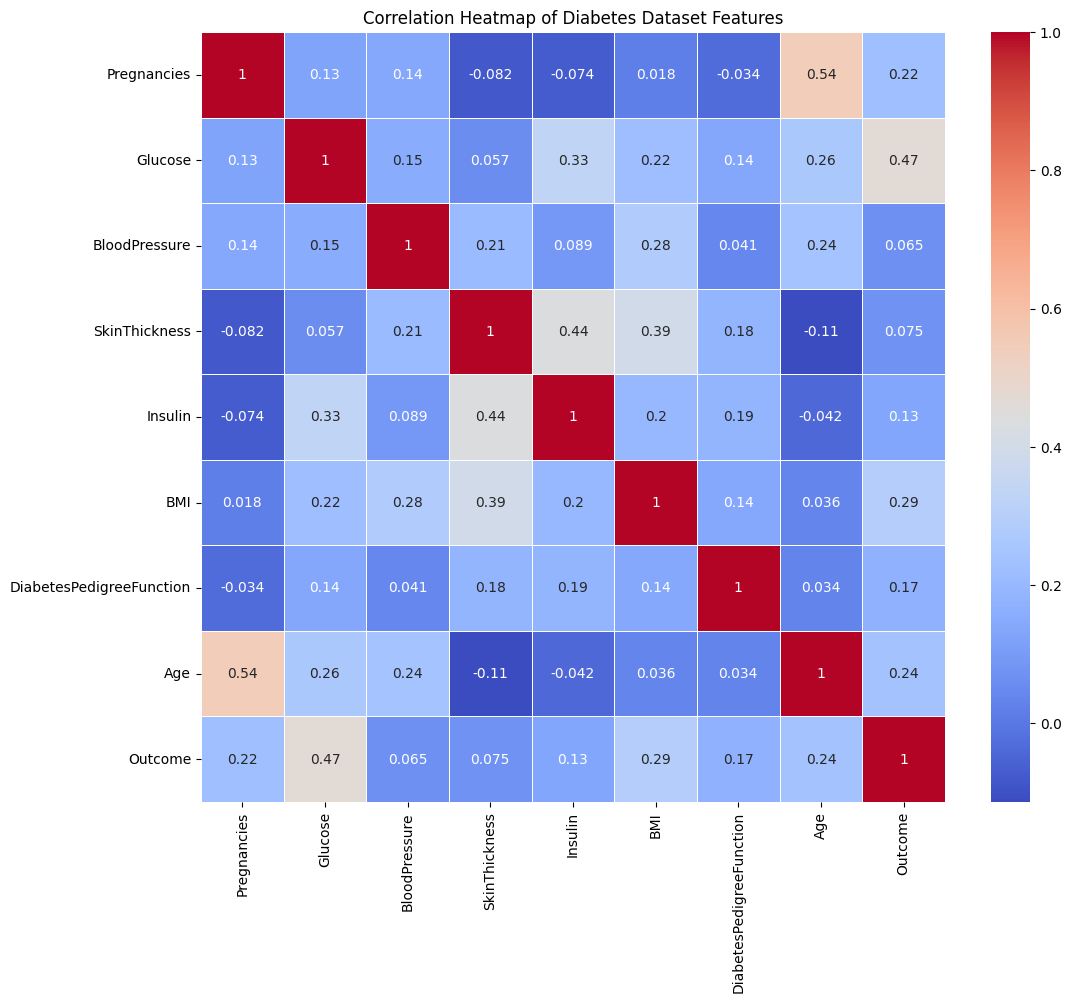

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.savefig('correlation_heatmap.png')
plt.show()

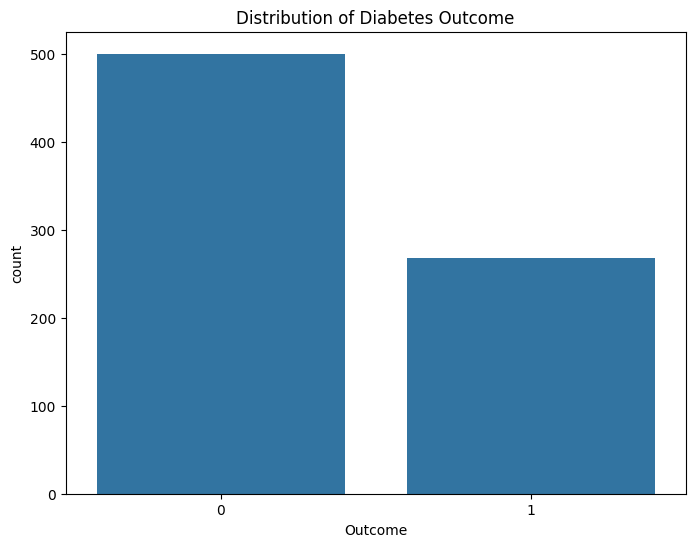

In [ ]:
# 2. Distribution of Outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.savefig('outcome_distribution.png')
plt.show()

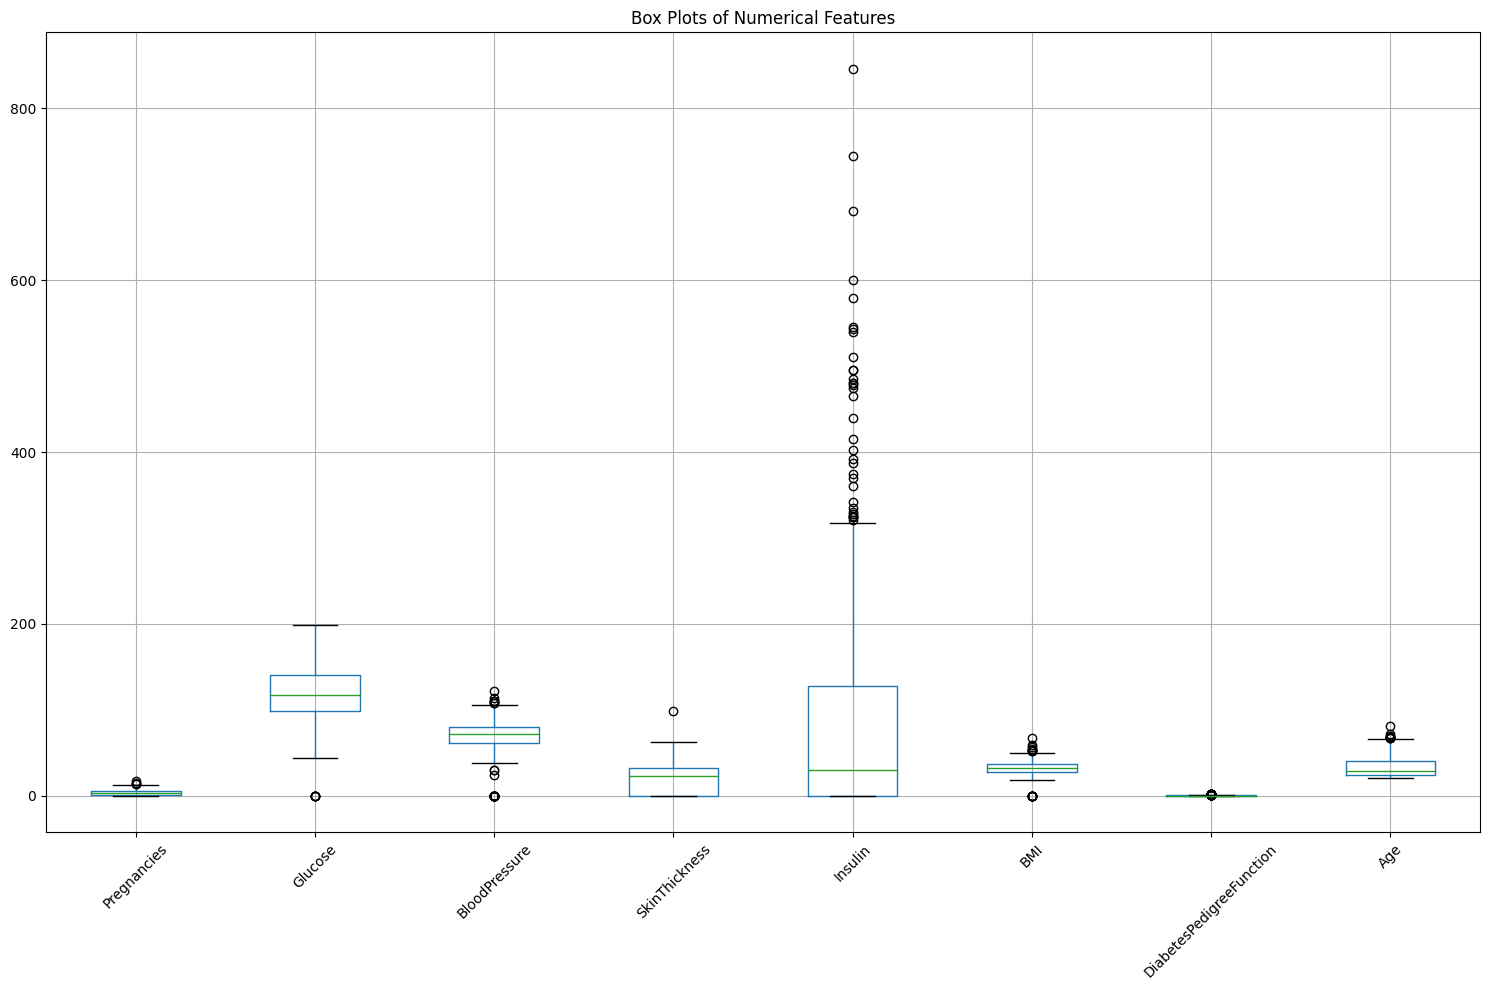

In [ ]:
# 3. Box plots for numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(15, 10))
df.boxplot(column=numerical_features)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

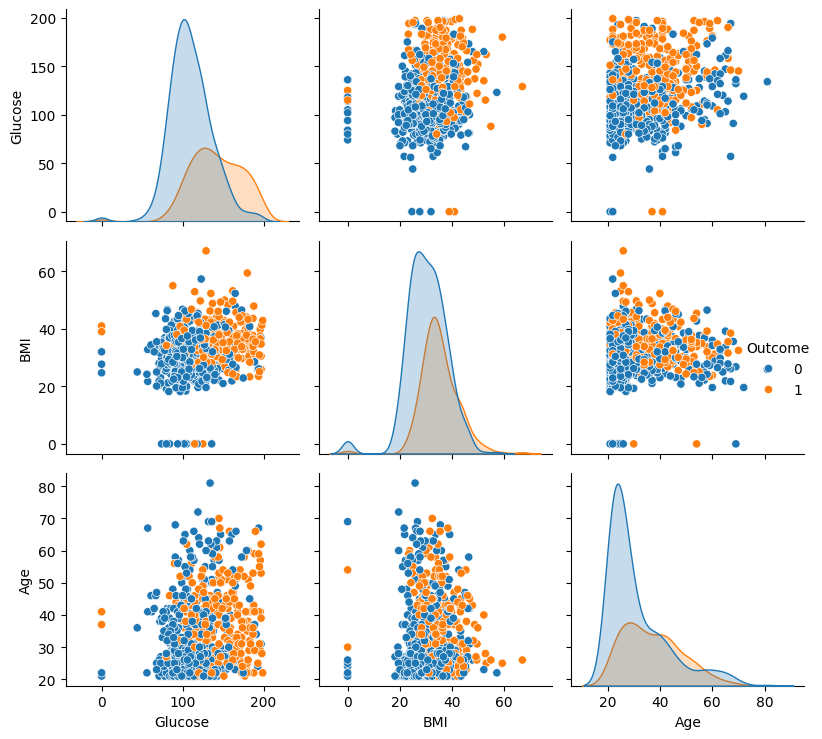

In [ ]:
# 4. Pairplot for key features
key_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(df[key_features], hue='Outcome', height=2.5)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

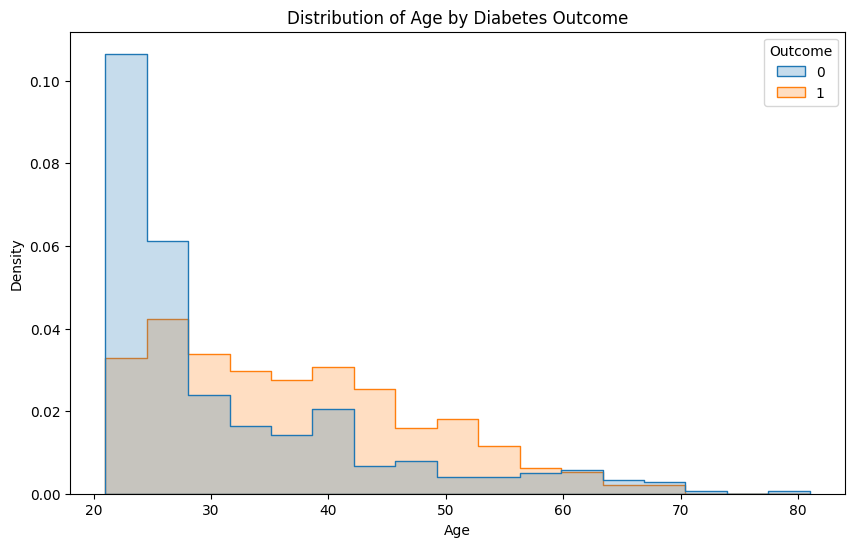

In [ ]:
# 5. Histogram of Age by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', element='step', stat='density', common_norm=False)
plt.title('Distribution of Age by Diabetes Outcome')
plt.savefig('age_distribution.png')
plt.show()